In [1]:
from sklearn.datasets import load_boston
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = load_boston()
X, y = data['data'], data['target']
X_rm = X[:, 5]

In [3]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

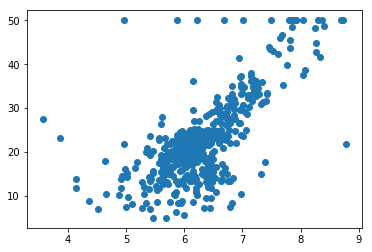

In [4]:
draw_rm_and_price()

### loss

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b_i))x_i$$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [5]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [6]:
def partial_k(x,y,y_hat):
    n = len(y)
    return -2/n*sum((y_i-y_hat_i)*x_i for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)))

In [7]:
def partial_b(x,y,y_hat):
    n = len(y)
    return -2/n*sum((y_i-y_hat_i) for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)))

In [8]:
import random

In [9]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

In [10]:

trying_times = 20000

min_loss = float('inf')

current_k = random.random() * 200 - 100   
current_b = random.random() * 200 - 100      #初始化问题

X, y = data['data'], data['target']


learning_rate = 1e-04                        #optimizer



for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]            #price 函数定义问题：减少过拟合，regulazation
    current_loss = loss(y, price_by_k_and_b)                                     #loss定义问题
    if current_loss < min_loss:
        
        min_loss = current_loss
        if i % 500 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, min_loss))
    
    k_gradient = partial_k(X_rm, y , price_by_k_and_b)                          #pytorch 快速求导
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    
    current_k = current_k+(-k_gradient)*learning_rate
    current_b = current_b+(-b_gradient)*learning_rate
    


When time is : 0, get best_k: -98.92291729321778 best_b: -55.29597467965364, and the loss is: 495125.69680940546
When time is : 500, get best_k: 7.8869452466655625 best_b: -38.50054489350136, and the loss is: 175.81521003244967
When time is : 1000, get best_k: 9.630730417891103 best_b: -38.22204038250963, and the loss is: 43.790775914420735
When time is : 1500, get best_k: 9.65855128654705 best_b: -38.21329941362606, and the loss is: 43.75518723439955
When time is : 2000, get best_k: 9.658347394837696 best_b: -38.20896932717685, and the loss is: 43.75480645416661
When time is : 2500, get best_k: 9.65768658683084 best_b: -38.20471631200797, and the loss is: 43.754435957140416
When time is : 3000, get best_k: 9.657019106406276 best_b: -38.20046958120031, and the loss is: 43.754066352486575
When time is : 3500, get best_k: 9.656352306108795 best_b: -38.196227972605385, and the loss is: 43.75369763556329
When time is : 4000, get best_k: 9.655686305073743 best_b: -38.191991461211, and the l

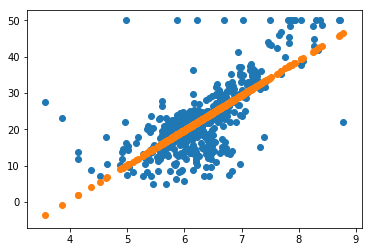

In [13]:
k = 9.6354324890377 
b = -38.06315454725581
price_by_gradient = [price(ii,k,b) for ii in X_rm]
draw_rm_and_price()
plt.scatter(X_rm,price_by_gradient)



In [12]:
locals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  "from sklearn.datasets import load_boston\nget_ipython().run_line_magic('matplotlib', 'inline')\nimport matplotlib.pyplot as plt",
  "data = load_boston()\nX, y = data['data'], data['target']\nX_rm = X[:, 5]",
  'def draw_rm_and_price():\n    plt.scatter(X[:, 5], y)',
  'draw_rm_and_price()',
  'def loss(y, y_hat): # to evaluate the performance \n    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))',
  'def partial_k(x,y,y_hat):\n    n = len(y)\n    return -2/n*sum((y_i-y_hat_i)*x_i for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)))',
  'def partial_b(x,y,y_hat):\n    n = len(y)\n    return -2/n*sum((y_i-y_hat_i) for x_i, y_i, y_hat_i in zip(list(x),list(y),list

#### 异常点&模型复杂度